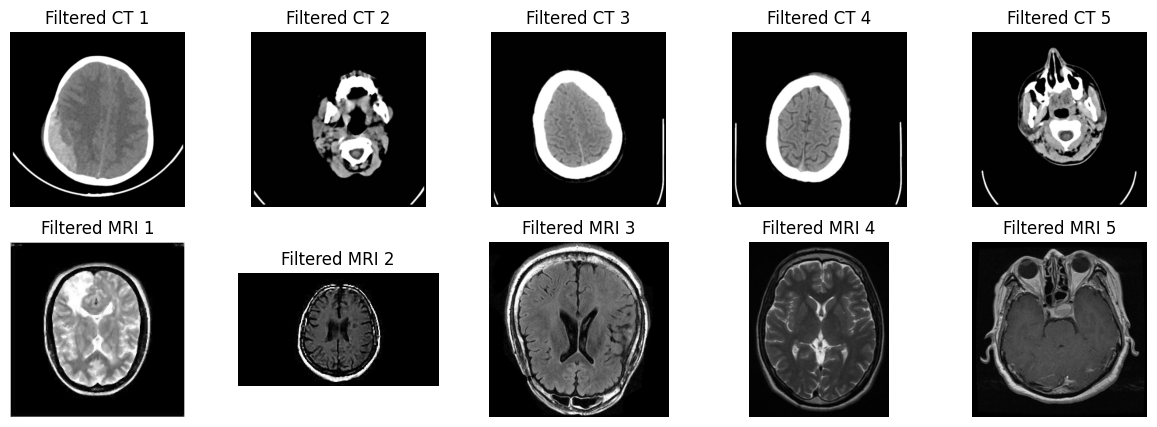

In [35]:
#Median Only
import cv2
import os
import matplotlib.pyplot as plt

# Directory paths for CT and MRI images
CT_directory = "/kaggle/input/ct-to-mri-cgan/Dataset/images/trainA"
MRI_directory = "/kaggle/input/ct-to-mri-cgan/Dataset/images/trainB"

# Function to apply fast median filter to an image
def fast_median_filter(image):
    blurred = cv2.medianBlur(image, 3)  # You can adjust the kernel size (3) as needed
    return blurred

# Function to load images from a directory and apply the filter
def load_and_filter_images(directory):
    filtered_images = []
    for filename in os.listdir(directory)[:5]:  # Load only the first five images
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is not None:
            filtered_image = fast_median_filter(image)
            filtered_images.append(filtered_image)
    return filtered_images

# Load and filter CT images
filtered_CT_images = load_and_filter_images(CT_directory)

# Load and filter MRI images
filtered_MRI_images = load_and_filter_images(MRI_directory)

# Display the first five filtered CT images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(filtered_CT_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered CT {}'.format(i + 1))

# Display the first five filtered MRI images
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cv2.cvtColor(filtered_MRI_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered MRI {}'.format(i + 1))

plt.show()


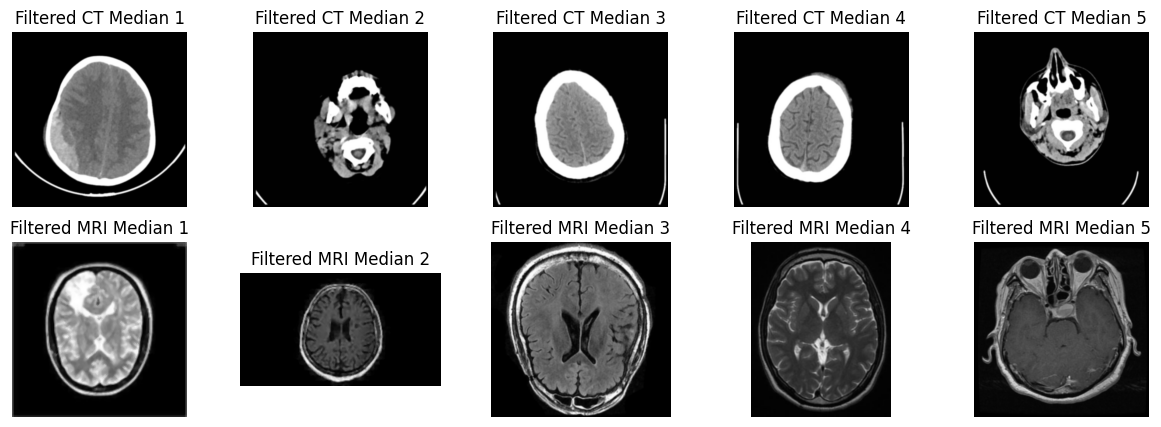

In [33]:
# Function to apply fast median filter to an image
def fast_median_filter(image):
    blurred = cv2.medianBlur(image, 3)  # You can adjust the kernel size (3) as needed
    return blurred

# Apply fast median filter to the filtered CT images
filtered_CT_images_median = [fast_median_filter(image) for image in filtered_CT_images]

# Apply fast median filter to the filtered MRI images
filtered_MRI_images_median = [fast_median_filter(image) for image in filtered_MRI_images]

# Display the first five filtered CT images after applying fast median filter
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(filtered_CT_images_median[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered CT Median {}'.format(i + 1))

# Display the first five filtered MRI images after applying fast median filter
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cv2.cvtColor(filtered_MRI_images_median[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered MRI Median {}'.format(i + 1))

plt.show()


In [34]:
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.measure import shannon_entropy

def calculate_metrics(original_images, filtered_images):
    metrics = []
    for original, filtered in zip(original_images, filtered_images):
        # Convert images to grayscale
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        filtered_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
        
        # Calculate intensities
        intensity_original = np.mean(original_gray)
        intensity_filtered = np.mean(filtered_gray)
        
        # Calculate entropy
        entropy_original = shannon_entropy(original_gray)
        entropy_filtered = shannon_entropy(filtered_gray)
        
        # Calculate SSIM
        ssim_value = ssim(original_gray, filtered_gray)
        
        # Calculate PSNR
        psnr_value = psnr(original_gray, filtered_gray)
        
        metrics.append({
            "Intensity (Original)": intensity_original,
            "Intensity (Filtered)": intensity_filtered,
            "Entropy (Original)": entropy_original,
            "Entropy (Filtered)": entropy_filtered,
            "SSIM": ssim_value,
            "PSNR": psnr_value
        })
    return metrics

# Original CT images
ct_images = [cv2.imread(os.path.join(CT_directory, filename)) for filename in os.listdir(CT_directory)[:5]]

# Original MRI images
mri_images = [cv2.imread(os.path.join(MRI_directory, filename)) for filename in os.listdir(MRI_directory)[:5]]

# Calculate metrics for filtered CT images
ct_metrics = calculate_metrics(ct_images, filtered_CT_images_median)

# Calculate metrics for filtered MRI images
mri_metrics = calculate_metrics(mri_images, filtered_MRI_images_median)

# Convert metrics to DataFrames
ct_df = pd.DataFrame(ct_metrics)
mri_df = pd.DataFrame(mri_metrics)

# Display metrics in table format
print("Metrics for Filtered CT Images (after applying fast median filter):")
print(ct_df)

print("\nMetrics for Filtered MRI Images (after applying fast median filter):")
print(mri_df)


Metrics for Filtered CT Images (after applying fast median filter):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.756912            3.697589   
1             28.034428             28.034172            2.409223   
2             48.525623             48.515827            2.792640   
3             45.548927             45.517715            2.784036   
4             33.764824             33.750572            2.815755   

   Entropy (Filtered)      SSIM       PSNR  
0            3.795656  0.980145  34.417460  
1            2.467287  0.992856  37.767759  
2            2.862742  0.988232  36.447727  
3            2.861048  0.983031  35.089564  
4            2.930869  0.983330  33.854538  

Metrics for Filtered MRI Images (after applying fast median filter):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             60.259496             58.903506            4.576938   
1             21.395060             21.

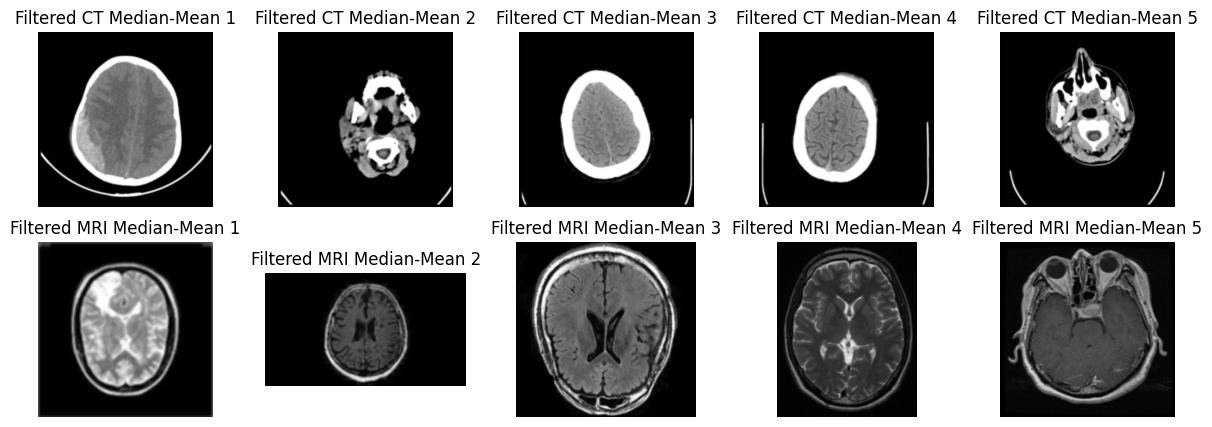

In [36]:
# Function to apply fast mean filter to an image
def fast_mean_filter(image):
    blurred = cv2.blur(image, (3, 3))  # You can adjust the kernel size (3, 3) as needed
    return blurred

# Apply fast mean filter to the filtered CT images obtained after applying fast median filter
filtered_CT_images_median_mean = [fast_mean_filter(image) for image in filtered_CT_images_median]

# Apply fast mean filter to the filtered MRI images obtained after applying fast median filter
filtered_MRI_images_median_mean = [fast_mean_filter(image) for image in filtered_MRI_images_median]

# Display the first five filtered CT images after applying fast mean filter on the output of fast median filter
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(filtered_CT_images_median_mean[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered CT Median-Mean {}'.format(i + 1))

# Display the first five filtered MRI images after applying fast mean filter on the output of fast median filter
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cv2.cvtColor(filtered_MRI_images_median_mean[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered MRI Median-Mean {}'.format(i + 1))

plt.show()


In [37]:
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.measure import shannon_entropy

def calculate_metrics(original_images, filtered_images):
    metrics = []
    for original, filtered in zip(original_images, filtered_images):
        # Convert images to grayscale
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        filtered_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
        
        # Calculate intensities
        intensity_original = np.mean(original_gray)
        intensity_filtered = np.mean(filtered_gray)
        
        # Calculate entropy
        entropy_original = shannon_entropy(original_gray)
        entropy_filtered = shannon_entropy(filtered_gray)
        
        # Calculate SSIM
        ssim_value = ssim(original_gray, filtered_gray)
        
        # Calculate PSNR
        psnr_value = psnr(original_gray, filtered_gray)
        
        metrics.append({
            "Intensity (Original)": intensity_original,
            "Intensity (Filtered)": intensity_filtered,
            "Entropy (Original)": entropy_original,
            "Entropy (Filtered)": entropy_filtered,
            "SSIM": ssim_value,
            "PSNR": psnr_value
        })
    return metrics

# Original CT images
ct_images = [cv2.imread(os.path.join(CT_directory, filename)) for filename in os.listdir(CT_directory)[:5]]

# Original MRI images
mri_images = [cv2.imread(os.path.join(MRI_directory, filename)) for filename in os.listdir(MRI_directory)[:5]]

# Calculate metrics for filtered CT images after applying fast median filter
ct_metrics_median = calculate_metrics(ct_images, filtered_CT_images_median)

# Calculate metrics for filtered CT images after applying both fast median and fast mean filters
ct_metrics_median_mean = calculate_metrics(ct_images, filtered_CT_images_median_mean)

# Convert metrics to DataFrames for CT images
ct_df_median = pd.DataFrame(ct_metrics_median)
ct_df_median_mean = pd.DataFrame(ct_metrics_median_mean)

# Calculate metrics for filtered MRI images after applying fast median filter
mri_metrics_median = calculate_metrics(mri_images, filtered_MRI_images_median)

# Calculate metrics for filtered MRI images after applying both fast median and fast mean filters
mri_metrics_median_mean = calculate_metrics(mri_images, filtered_MRI_images_median_mean)

# Convert metrics to DataFrames for MRI images
mri_df_median = pd.DataFrame(mri_metrics_median)
mri_df_median_mean = pd.DataFrame(mri_metrics_median_mean)

# Display metrics in table format for CT images
print("Metrics for Filtered CT Images (after applying fast median filter):")
print(ct_df_median)

print("\nMetrics for Filtered CT Images (after applying both fast median and mean filters):")
print(ct_df_median_mean)

# Display metrics in table format for MRI images
print("\nMetrics for Filtered MRI Images (after applying fast median filter):")
print(mri_df_median)

print("\nMetrics for Filtered MRI Images (after applying both fast median and mean filters):")
print(mri_df_median_mean)


Metrics for Filtered CT Images (after applying fast median filter):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.756912            3.697589   
1             28.034428             28.034172            2.409223   
2             48.525623             48.515827            2.792640   
3             45.548927             45.517715            2.784036   
4             33.764824             33.750572            2.815755   

   Entropy (Filtered)      SSIM       PSNR  
0            3.795656  0.980145  34.417460  
1            2.467287  0.992856  37.767759  
2            2.862742  0.988232  36.447727  
3            2.861048  0.983031  35.089564  
4            2.930869  0.983330  33.854538  

Metrics for Filtered CT Images (after applying both fast median and mean filters):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.756950            3.697589   
1             28.034428  

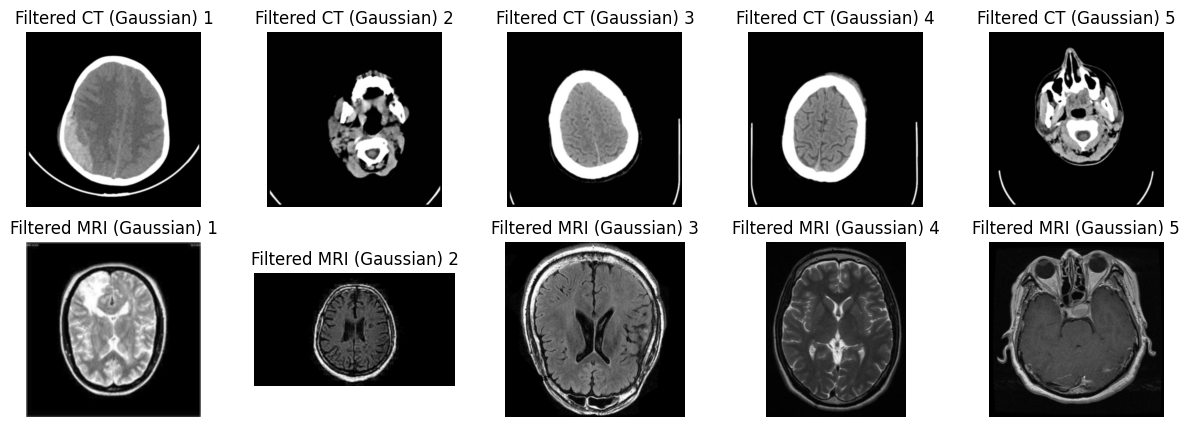

In [38]:
#Fast 2D Gauss only
import cv2
import os
import matplotlib.pyplot as plt

# Directory paths for CT and MRI images
CT_directory = "/kaggle/input/ct-to-mri-cgan/Dataset/images/trainA"
MRI_directory = "/kaggle/input/ct-to-mri-cgan/Dataset/images/trainB"

# Function to apply fast 2D Gaussian filter to an image
def fast_gaussian_filter(image):
    blurred = cv2.GaussianBlur(image, (3, 3), 0)  # You can adjust the kernel size (3, 3) as needed
    return blurred

# Function to load images from a directory and apply the filter
def load_and_filter_images(directory):
    filtered_images = []
    for filename in os.listdir(directory)[:5]:  # Load only the first five images
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is not None:
            filtered_image = fast_gaussian_filter(image)
            filtered_images.append(filtered_image)
    return filtered_images

# Load and filter CT images
filtered_CT_images_gaussian = load_and_filter_images(CT_directory)

# Load and filter MRI images
filtered_MRI_images_gaussian = load_and_filter_images(MRI_directory)

# Display the first five filtered CT images after applying fast 2D Gaussian filter
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(filtered_CT_images_gaussian[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered CT (Gaussian) {}'.format(i + 1))

# Display the first five filtered MRI images after applying fast 2D Gaussian filter
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cv2.cvtColor(filtered_MRI_images_gaussian[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered MRI (Gaussian) {}'.format(i + 1))

plt.show()


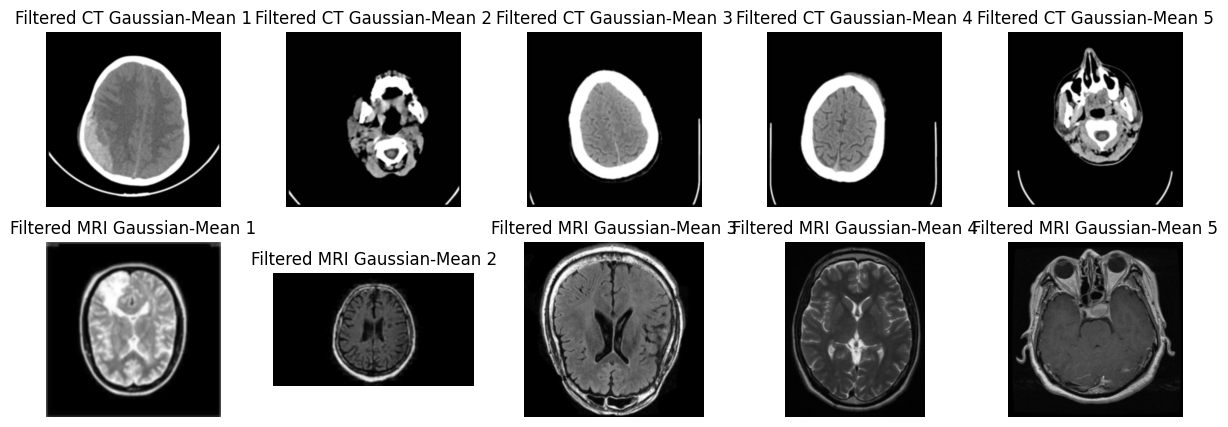

In [39]:
# Function to apply fast mean filter to an image
def fast_mean_filter(image):
    blurred = cv2.blur(image, (3, 3))  # You can adjust the kernel size (3, 3) as needed
    return blurred

# Apply fast mean filter to the filtered CT images obtained after applying fast median filter
filtered_CT_images_gaussian_mean = [fast_mean_filter(image) for image in filtered_CT_images_gaussian]

# Apply fast mean filter to the filtered MRI images obtained after applying fast median filter
filtered_MRI_images_gaussian_mean = [fast_mean_filter(image) for image in filtered_MRI_images_gaussian]

# Display the first five filtered CT images after applying fast mean filter on the output of fast median filter
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(filtered_CT_images_gaussian_mean[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered CT Gaussian-Mean {}'.format(i + 1))

# Display the first five filtered MRI images after applying fast mean filter on the output of fast median filter
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cv2.cvtColor(filtered_MRI_images_gaussian_mean[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered MRI Gaussian-Mean {}'.format(i + 1))

plt.show()


In [40]:
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.measure import shannon_entropy

def calculate_metrics(original_images, filtered_images):
    metrics = []
    for original, filtered in zip(original_images, filtered_images):
        # Convert images to grayscale
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        filtered_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
        
        # Calculate intensities
        intensity_original = np.mean(original_gray)
        intensity_filtered = np.mean(filtered_gray)
        
        # Calculate entropy
        entropy_original = shannon_entropy(original_gray)
        entropy_filtered = shannon_entropy(filtered_gray)
        
        # Calculate SSIM
        ssim_value = ssim(original_gray, filtered_gray)
        
        # Calculate PSNR
        psnr_value = psnr(original_gray, filtered_gray)
        
        metrics.append({
            "Intensity (Original)": intensity_original,
            "Intensity (Filtered)": intensity_filtered,
            "Entropy (Original)": entropy_original,
            "Entropy (Filtered)": entropy_filtered,
            "SSIM": ssim_value,
            "PSNR": psnr_value
        })
    return metrics

# Original CT images
ct_images = [cv2.imread(os.path.join(CT_directory, filename)) for filename in os.listdir(CT_directory)[:5]]

# Original MRI images
mri_images = [cv2.imread(os.path.join(MRI_directory, filename)) for filename in os.listdir(MRI_directory)[:5]]

# Calculate metrics for filtered CT images after applying fast median filter
ct_metrics_gaussian = calculate_metrics(ct_images,filtered_CT_images_gaussian)

# Calculate metrics for filtered CT images after applying both fast median and fast mean filters
ct_metrics_gaussian_mean = calculate_metrics(ct_images, filtered_CT_images_gaussian_mean)

# Convert metrics to DataFrames for CT images
ct_df_gaussian = pd.DataFrame(ct_metrics_gaussian)
ct_df_gaussian_mean = pd.DataFrame(ct_metrics_gaussian_mean)

# Calculate metrics for filtered MRI images after applying fast median filter
mri_metrics_gaussian = calculate_metrics(mri_images, filtered_MRI_images_gaussian)

# Calculate metrics for filtered MRI images after applying both fast median and fast mean filters
mri_metrics_gaussian_mean = calculate_metrics(mri_images, filtered_MRI_images_gaussian_mean)

# Convert metrics to DataFrames for MRI images
mri_df_gaussian = pd.DataFrame(mri_metrics_gaussian)
mri_df_gaussian_mean = pd.DataFrame(mri_metrics_gaussian_mean)

# Display metrics in table format for CT images
print("Metrics for Filtered CT Images (after applying fast Gaussian filter):")
print(ct_df_gaussian)

print("\nMetrics for Filtered CT Images (after applying both fast Gaussian and mean filters):")
print(ct_df_gaussian_mean)

# Display metrics in table format for MRI images
print("\nMetrics for Filtered MRI Images (after applying fast Gaussian filter):")
print(mri_df_gaussian)

print("\nMetrics for Filtered MRI Images (after applying both fast Gaussian and mean filters):")
print(mri_df_gaussian_mean)


Metrics for Filtered CT Images (after applying fast Gaussian filter):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.776741            3.697589   
1             28.034428             28.040619            2.409223   
2             48.525623             48.534229            2.792640   
3             45.548927             45.557178            2.784036   
4             33.764824             33.772079            2.815755   

   Entropy (Filtered)      SSIM       PSNR  
0            3.792558  0.990537  36.776681  
1            2.460549  0.996490  40.825863  
2            2.858000  0.994776  39.214629  
3            2.860983  0.991974  38.111079  
4            2.914033  0.992141  37.075457  

Metrics for Filtered CT Images (after applying both fast Gaussian and mean filters):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.776581            3.697589   
1             28.0344

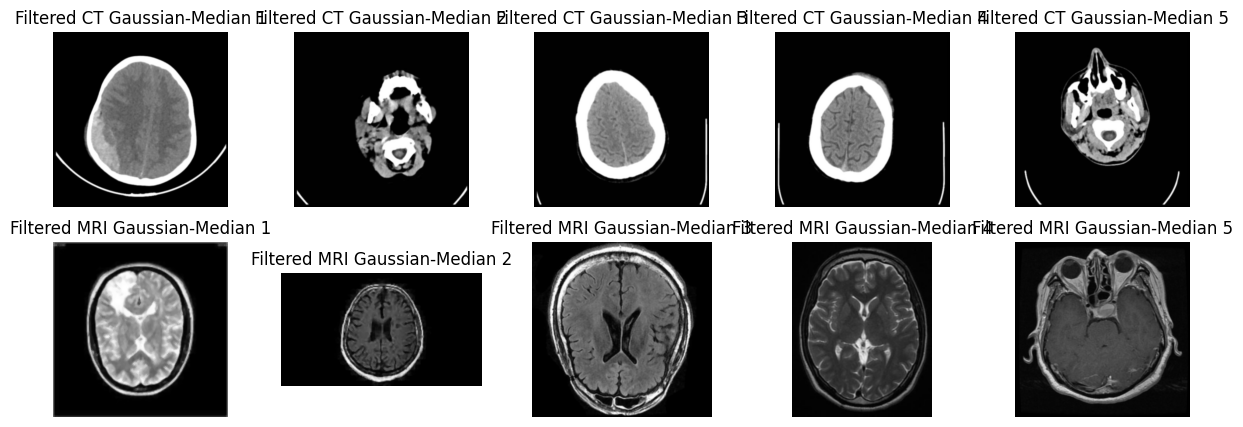

In [41]:
#fast median on Gaussian
# Function to apply fast median filter to an image
def fast_median_filter(image):
    blurred = cv2.medianBlur(image, 3)  # You can adjust the kernel size (3) as needed
    return blurred

# Apply fast median filter to the filtered CT images obtained after applying fast Gaussian filter
filtered_CT_images_gaussian_median = [fast_median_filter(image) for image in filtered_CT_images_gaussian]

# Apply fast median filter to the filtered MRI images obtained after applying fast Gaussian filter
filtered_MRI_images_gaussian_median = [fast_median_filter(image) for image in filtered_MRI_images_gaussian]

# Display the first five filtered CT images after applying fast median filter on the output of fast Gaussian filter
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(filtered_CT_images_gaussian_median[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered CT Gaussian-Median {}'.format(i + 1))

# Display the first five filtered MRI images after applying fast median filter on the output of fast Gaussian filter
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cv2.cvtColor(filtered_MRI_images_gaussian_median[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Filtered MRI Gaussian-Median {}'.format(i + 1))

plt.show()


In [42]:
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.measure import shannon_entropy

def calculate_metrics(original_images, filtered_images):
    metrics = []
    for original, filtered in zip(original_images, filtered_images):
        # Convert images to grayscale
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        filtered_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
        
        # Calculate intensities
        intensity_original = np.mean(original_gray)
        intensity_filtered = np.mean(filtered_gray)
        
        # Calculate entropy
        entropy_original = shannon_entropy(original_gray)
        entropy_filtered = shannon_entropy(filtered_gray)
        
        # Calculate SSIM
        ssim_value = ssim(original_gray, filtered_gray)
        
        # Calculate PSNR
        psnr_value = psnr(original_gray, filtered_gray)
        
        metrics.append({
            "Intensity (Original)": intensity_original,
            "Intensity (Filtered)": intensity_filtered,
            "Entropy (Original)": entropy_original,
            "Entropy (Filtered)": entropy_filtered,
            "SSIM": ssim_value,
            "PSNR": psnr_value
        })
    return metrics

# Original CT images
ct_images = [cv2.imread(os.path.join(CT_directory, filename)) for filename in os.listdir(CT_directory)[:5]]

# Original MRI images
mri_images = [cv2.imread(os.path.join(MRI_directory, filename)) for filename in os.listdir(MRI_directory)[:5]]

# Calculate metrics for filtered CT images after applying fast median filter
ct_metrics_gaussian = calculate_metrics(ct_images,filtered_CT_images_gaussian)

# Calculate metrics for filtered CT images after applying both fast median and fast mean filters
ct_metrics_gaussian_median = calculate_metrics(ct_images, filtered_CT_images_gaussian_median)

# Convert metrics to DataFrames for CT images
ct_df_gaussian = pd.DataFrame(ct_metrics_gaussian)
ct_df_gaussian_median = pd.DataFrame(ct_metrics_gaussian_median)

# Calculate metrics for filtered MRI images after applying fast median filter
mri_metrics_gaussian = calculate_metrics(mri_images, filtered_MRI_images_gaussian)

# Calculate metrics for filtered MRI images after applying both fast median and fast mean filters
mri_metrics_gaussian_median = calculate_metrics(mri_images, filtered_MRI_images_gaussian_median)

# Convert metrics to DataFrames for MRI images
mri_df_gaussian = pd.DataFrame(mri_metrics_gaussian)
mri_df_gaussian_median = pd.DataFrame(mri_metrics_gaussian_median)

# Display metrics in table format for CT images
print("Metrics for Filtered CT Images (after applying fast Gaussian filter):")
print(ct_df_gaussian)

print("\nMetrics for Filtered CT Images (after applying both fast Gaussian and median filters):")
print(ct_df_gaussian_median)

# Display metrics in table format for MRI images
print("\nMetrics for Filtered MRI Images (after applying fast Gaussian filter):")
print(mri_df_gaussian)

print("\nMetrics for Filtered MRI Images (after applying both fast Gaussian and median filters):")
print(mri_df_gaussian_median)


Metrics for Filtered CT Images (after applying fast Gaussian filter):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.776741            3.697589   
1             28.034428             28.040619            2.409223   
2             48.525623             48.534229            2.792640   
3             45.548927             45.557178            2.784036   
4             33.764824             33.772079            2.815755   

   Entropy (Filtered)      SSIM       PSNR  
0            3.792558  0.990537  36.776681  
1            2.460549  0.996490  40.825863  
2            2.858000  0.994776  39.214629  
3            2.860983  0.991974  38.111079  
4            2.914033  0.992141  37.075457  

Metrics for Filtered CT Images (after applying both fast Gaussian and median filters):
   Intensity (Original)  Intensity (Filtered)  Entropy (Original)  \
0             56.763397             56.772186            3.697589   
1             28.03

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models

# Set image parameters
IMG_SIZE = 128
BATCH_SIZE = 32

# ✅ Corrected paths
CT_PATH = "/kaggle/input/ct-to-mri-cgan/Dataset/images/trainA"  # CT images (label 0)
MRI_PATH = "/kaggle/input/ct-to-mri-cgan/Dataset/images/trainB"  # MRI images (label 1)


In [44]:
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print("DIR:", root)
    for d in dirs:
        print(" -", d)


DIR: /kaggle/input
 - ct-to-mri-cgan
DIR: /kaggle/input/ct-to-mri-cgan
 - Dataset
DIR: /kaggle/input/ct-to-mri-cgan/Dataset
 - images
 - unseen_demo_images
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/images
 - testB
 - testA
 - trainB
 - trainA
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/images/testB
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/images/testA
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/images/trainB
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/images/trainA
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/unseen_demo_images
 - ct
 - mri
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/unseen_demo_images/ct
DIR: /kaggle/input/ct-to-mri-cgan/Dataset/unseen_demo_images/mri


In [45]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)
    return images, labels

# Load CT (label 0) and MRI (label 1)
ct_images, ct_labels = load_images_from_folder(CT_PATH, 0)
mri_images, mri_labels = load_images_from_folder(MRI_PATH, 1)

# Combine data
X = np.array(ct_images + mri_images)
y = np.array(ct_labels + mri_labels)

print(f"Total images: {len(X)} | CT: {len(ct_images)} | MRI: {len(mri_images)}")


Total images: 3486 | CT: 1742 | MRI: 1744


In [46]:
# Split into training and testing sets (stratify to keep label balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")
print(f"Class distribution in train: {np.bincount(y_train)}")
print(f"Class distribution in test: {np.bincount(y_test)}")


Training data shape: (2788, 128, 128), Labels: (2788,)
Testing data shape: (698, 128, 128), Labels: (698,)
Class distribution in train: [1393 1395]
Class distribution in test: [349 349]


In [47]:
# Define a simple grayscale CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the CNN
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8209 - loss: 7.1547 - val_accuracy: 0.9283 - val_loss: 226.2686
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9215 - loss: 1.7145 - val_accuracy: 0.9462 - val_loss: 542.3862
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9361 - loss: 0.8884 - val_accuracy: 0.9319 - val_loss: 297.4993
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9756 - loss: 0.3722 - val_accuracy: 0.9677 - val_loss: 11.0670
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9852 - loss: 0.6283 - val_accuracy: 0.9534 - val_loss: 292.6982
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9605 - loss: 1.6784 - val_accuracy: 0.9677 - val_loss: 19.7328
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9840 - loss: 0.3678 - val_accuracy: 0.9427 - val_loss: 170.9522
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9789 - loss: 0.3799 - val_accuracy: 0.978

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Confusion Matrix:
 [[346   3]
 [  7 342]]

Classification Report:
               precision    recall  f1-score   support

          CT       0.98      0.99      0.99       349
         MRI       0.99      0.98      0.99       349

    accuracy                           0.99       698
   macro avg       0.99      0.99      0.99       698
weighted avg       0.99      0.99      0.99       698



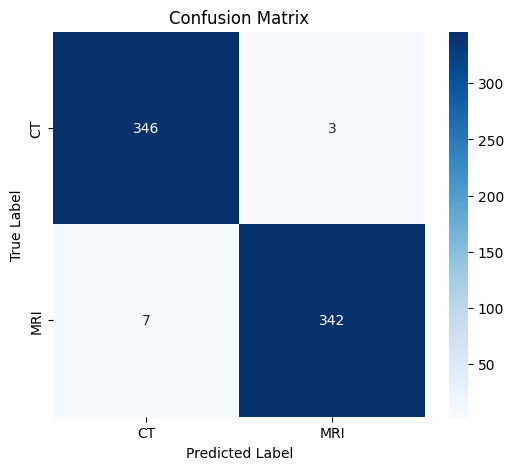

In [49]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["CT", "MRI"]))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["CT", "MRI"], yticklabels=["CT", "MRI"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


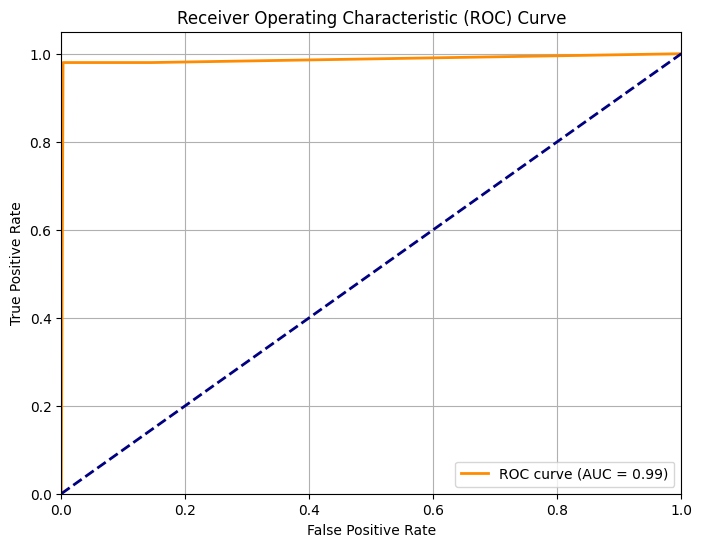

In [50]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


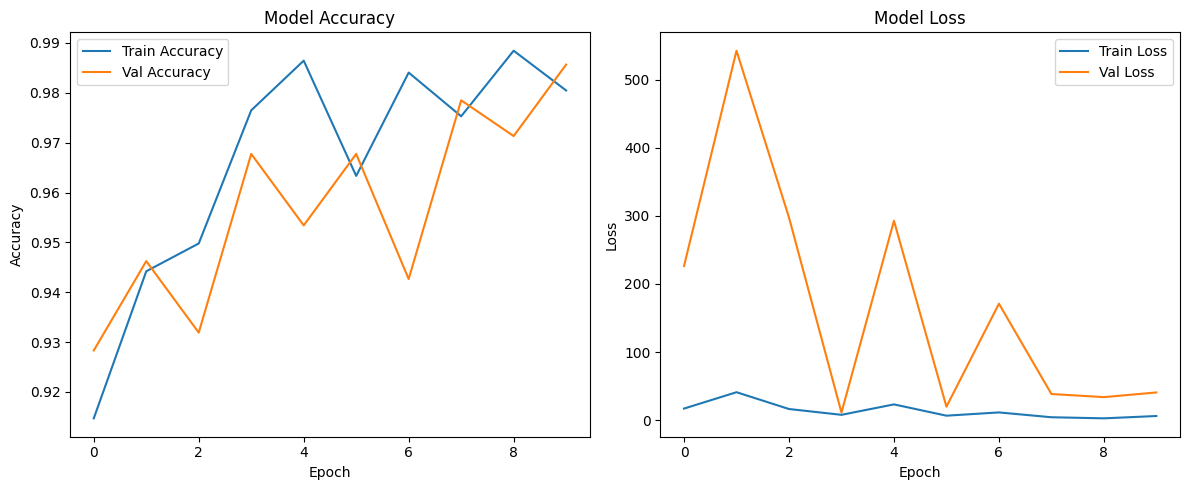

In [51]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [52]:
model.save("ct_mri_grayscale_cnn.h5")
